## 컨볼루션 신경망(CNN)

### 간단한 convenets 예제

- 딥러닝3_손글씨 숫자 분류 예제

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# 이미지 데이터 로드 및 전처리 

In [4]:
# 데이터 로드 
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape
y_train.shape

X_test.shape
y_test.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [7]:
X_train.shape[0]

60000

In [8]:
# 차원 변환 및 정규화

# (이미지수,세로, 가로, 채널) : 1(흑백), 3(컬러)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [9]:
X_train.shape
y_train.shape

X_test.shape
y_test.shape

(60000, 28, 28, 1)

(60000,)

(10000, 28, 28, 1)

(10000,)

In [10]:
from  keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# 컨볼류션 신경망 설정 

import tensorflow as tf
tf.random.set_seed(3)

# (1) 모델 설정 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D



In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)             

In [ ]:
# (2) 컴파일


In [23]:
# CheckPoint와 EarlyStopping 적용

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 파일 저장할 폴더 지정 : 없으면 새로 생성
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# model 안에 파일로 저장
model_path = "./model/{epoch:02d}-{val_loss: .4f}.keras"

# EearlyStopping : 모델 최적화 단계에서 학습 자동 중단 설정
check_pointer = ModelCheckpoint(filepath=model_path,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)

early_stopping= EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# (3) 모델 학습 (실행)


Epoch 1/30


299/300 [============================>.] - ETA: 0s - loss: 0.3649 - accuracy: 0.8870
Epoch 1: val_loss improved from inf to 0.06842, saving model to ./model\01- 0.0684.keras
300/300 [==============================] - 7s 22ms/step - loss: 0.3641 - accuracy: 0.8873 - val_loss: 0.0684 - val_accuracy: 0.9776
Epoch 2/30
299/300 [============================>.] - ETA: 0s - loss: 0.1166 - accuracy: 0.9659
Epoch 2: val_loss improved from 0.06842 to 0.04588, saving model to ./model\02- 0.0459.keras
300/300 [==============================] - 7s 22ms/step - loss: 0.1167 - accuracy: 0.9658 - val_loss: 0.0459 - val_accuracy: 0.9840
Epoch 3/30
298/300 [============================>.] - ETA: 0s - loss: 0.0847 - accuracy: 0.9743
Epoch 3: val_loss improved from 0.04588 to 0.03655, saving model to ./model\03- 0.0366.keras
300/300 [==============================] - 6s 21ms/step - loss: 0.0847 - accuracy: 0.9743 - val_loss: 0.0366 - val_accuracy: 0.9876
Epoch 4/30
300/300 [===================

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')

# 정확도: 0.9927, 손실: 0.0223 val_loss: 0.0223 - val_accuracy: 0.9927

313/313 [==============================] - 1s 2ms/step - loss: 0.0223 - accuracy: 0.9927
정확도: 0.9927, 손실: 0.0223


Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

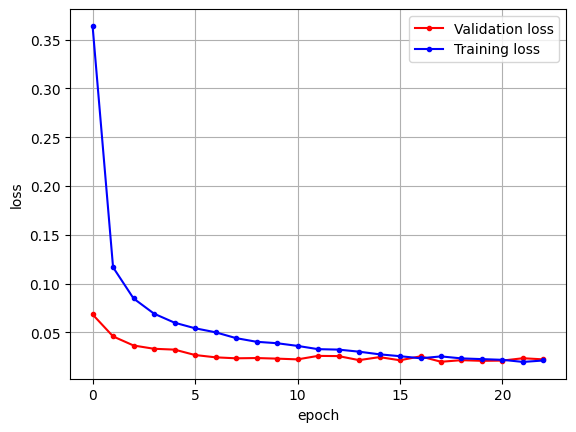

In [26]:
import numpy as np

# 시각화 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Loss
x_len = np.arange(len(loss))
plt.plot(x_len, val_loss, marker='.', c='red', label='Validation loss')
plt.plot(x_len, loss, marker='.', c='blue', label='Training loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

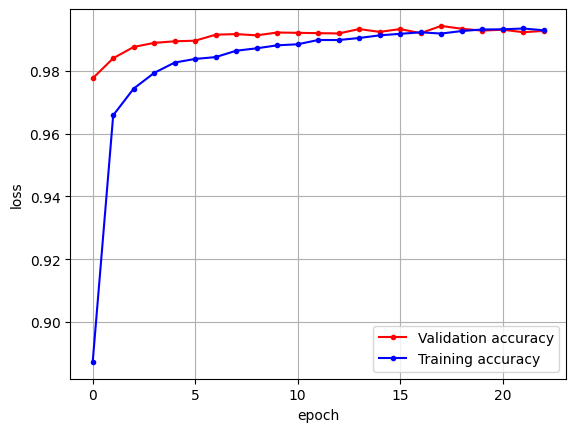

In [27]:
x_len = np.arange(len(loss))
plt.plot(x_len, val_acc, marker='.', c='red', label='Validation accuracy')
plt.plot(x_len, acc, marker='.', c='blue', label='Training accuracy')

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()